# CRISP-DM Phase 2 - Data Understanding

## Background information about the data

The dataset used in the assignment is the [European Soccer Database](https://www.kaggle.com/datasets/hugomathien/soccer/data) from Kaggle.com. The database has been created using web crawling scripts ([GITHUB](https://github.com/hugomathien/football-data-collection/tree/master)) from the following websites:
1. http://football-data.mx-api.enetscores.com/ : results, lineups, team information and events
2. http://www.football-data.co.uk/ : betting odds
3. http://sofifa.com/ : player and team attributes from EA Sports FIFA games

The data in the database includes:
* +25000 matches
* +10000 players
* 11 European football leagues
* From the seasons 2008-2016
* The source of the player and team attributes has been the sofifa website of the "EA Sports FIFA" video games.
* Match lineups with positions
* Betting odds from 10 different betting service providers
* Match metadata, i.e. match scorecard entries (goal types, possession, corners, cards, etc.) for over 10,000 matches.


## Loading Database data

The data is in a **sqlite** database. The database is built from 7 different tables:

In [1]:
import pandas as pd
import sqlite3 as sql

con = sql.connect(r"C:\Users\jmhel\OneDrive\Työpöytä\JAMK\DA ML basics\archive\database.sqlite")

sql_query = '''
SELECT
name
FROM
sqlite_schema
WHERE
type ='table' AND
name NOT LIKE 'sqlite_%';
'''
df_tables = pd.read_sql_query(sql_query, con)
df_tables.sort_values('name')

,name
4,Country
3,League
2,Match
1,Player
0,Player_Attributes
5,Team
6,Team_Attributes


## Tables in the Database

### Country

In [2]:
sql_query = '''
SELECT
*
FROM
Country;
'''
df_country = pd.read_sql_query(sql_query, con)
df_country

,id,name
0,1,Belgium
1,1729,England
2,4769,France
3,7809,Germany
4,10257,Italy
5,13274,Netherlands
6,15722,Poland
7,17642,Portugal
8,19694,Scotland
9,21518,Spain


### League

In [3]:
sql_query = '''
SELECT
*
FROM
League;
'''
df_league = pd.read_sql_query(sql_query, con)
df_league

,id,country_id,name
0,1,1,Belgium Jupiler League
1,1729,1729,England Premier League
2,4769,4769,France Ligue 1
3,7809,7809,Germany 1. Bundesliga
4,10257,10257,Italy Serie A
5,13274,13274,Netherlands Eredivisie
6,15722,15722,Poland Ekstraklasa
7,17642,17642,Portugal Liga ZON Sagres
8,19694,19694,Scotland Premier League
9,21518,21518,Spain LIGA BBVA


### Match

In [4]:
sql_query = '''
SELECT
*
FROM
Match;
'''
df_match = pd.read_sql_query(sql_query, con)
df_match.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25979 entries, 0 to 25978
Data columns (total 115 columns):
 #    Column            Non-Null Count  Dtype  
---   ------            --------------  -----  
 0    id                25979 non-null  int64  
 1    country_id        25979 non-null  int64  
 2    league_id         25979 non-null  int64  
 3    season            25979 non-null  object 
 4    stage             25979 non-null  int64  
 5    date              25979 non-null  object 
 6    match_api_id      25979 non-null  int64  
 7    home_team_api_id  25979 non-null  int64  
 8    away_team_api_id  25979 non-null  int64  
 9    home_team_goal    25979 non-null  int64  
 10   away_team_goal    25979 non-null  int64  
 11   home_player_X1    24158 non-null  float64
 12   home_player_X2    24158 non-null  float64
 13   home_player_X3    24147 non-null  float64
 14   home_player_X4    24147 non-null  float64
 15   home_player_X5    24147 non-null  float64
 16   home_player_X6    24

#### Sample data from the Match table

In [5]:
df_match.sample(5)

,id,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,...,SJA,VCH,VCD,VCA,GBH,GBD,GBA,BSH,BSD,BSA
5549,5550,4769,4769,2010/2011,11,2010-10-30 00:00:00,829983,8521,9853,2,...,2.70,2.62,3.0,3.12,2.65,3.00,2.65,2.6,3.00,2.7
21764,21765,21518,21518,2008/2009,31,2009-04-18 00:00:00,530611,8479,8633,0,...,1.53,5.50,3.6,1.55,6.00,3.75,1.55,5.5,3.75,1.6
10452,10453,10257,10257,2008/2009,27,2009-03-07 00:00:00,539825,9804,9885,0,...,2.30,3.00,3.1,2.25,3.50,3.00,2.25,3.2,3.00,2.3
6474,6475,4769,4769,2012/2013,26,2013-02-24 00:00:00,1217067,9847,8592,2,...,7.00,1.53,4.1,8.00,1.50,4.10,6.50,1.5,4.00,7.0
10048,10049,7809,7809,2015/2016,19,2016-01-30 00:00:00,2002263,8262,10189,0,...,NaN,3.40,3.5,2.15,NaN,NaN,NaN,NaN,NaN,NaN


#### Statistical analysis of the Match table

In [6]:
print(df_match[['home_team_goal', 'away_team_goal']].describe())

       home_team_goal  away_team_goal
count    25979.000000    25979.000000
mean         1.544594        1.160938
std          1.297158        1.142110
min          0.000000        0.000000
25%          1.000000        0.000000
50%          1.000000        1.000000
75%          2.000000        2.000000
max         10.000000        9.000000


#### Info on the dataframe created from the Match table

In [7]:
print(df_match.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25979 entries, 0 to 25978
Columns: 115 entries, id to BSA
dtypes: float64(96), int64(9), object(10)
memory usage: 22.8+ MB
None


#### Counting missing values in the Match table

In [8]:
missing_values = df_match.isnull().sum()
missing_percent = (missing_values / len(df_match)) * 100
missing_data = pd.DataFrame({'Missing Values': missing_values, 'Percentage': missing_percent})

print("Missing values per column:")
print(missing_data[missing_data['Missing Values'] > 0])

Missing values per column:
                Missing Values  Percentage
home_player_X1            1821    7.009508
home_player_X2            1821    7.009508
home_player_X3            1832    7.051850
home_player_X4            1832    7.051850
home_player_X5            1832    7.051850
...                        ...         ...
GBD                      11817   45.486739
GBA                      11817   45.486739
BSH                      11818   45.490589
BSD                      11818   45.490589
BSA                      11818   45.490589

[104 rows x 2 columns]


### Player

In [9]:
sql_query = '''
SELECT
*
FROM
Player;
'''
df_player = pd.read_sql_query(sql_query, con)
df_player.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11060 entries, 0 to 11059
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  11060 non-null  int64  
 1   player_api_id       11060 non-null  int64  
 2   player_name         11060 non-null  object 
 3   player_fifa_api_id  11060 non-null  int64  
 4   birthday            11060 non-null  object 
 5   height              11060 non-null  float64
 6   weight              11060 non-null  int64  
dtypes: float64(1), int64(4), object(2)
memory usage: 605.0+ KB


#### Player table data sample

In [10]:
df_player.sample(5)

,id,player_api_id,player_name,player_fifa_api_id,birthday,height,weight
10667,10683,358713,Vitor Bruno,223966,1990-01-13 00:00:00,170.18,152
3781,3785,42113,Germano Vailati,142532,1980-08-30 00:00:00,185.42,185
330,331,303484,Alejandro Galvez,199487,1989-06-06 00:00:00,190.50,174
9234,9248,150053,Rossetto Michel Simplicio,177566,1986-06-23 00:00:00,180.34,157
7866,7878,27157,Nick Proschwitz,199510,1986-11-28 00:00:00,193.04,187


### Player_Attributes


| Column | Explanation |
| ------ | ------- |
| overall_rating | overall rating |
| potential | potential |
| preferred_foot | player's footwork |
| attacking_work_rate | player's attack class |
| defensive_work_rate | player's defense class |
| crossing | centering |
| finishing | finishing |
| heading_accuracy | head game/heading |
| short_passing | success in short passes |
| volleys | success in direct kicks from the air |
| dribbling | ball control when moving at high speed |
| curve | potential amount of spin in shots and crosses, the higher the more spin |
| free_kick_accuracy | free kick accuracy, potential to shoot over the wall and hit the goal |
| long_passing | long passes, potential to succeed in long passes |
| ball_control | ball control |
| acceleration | player's ability to accelerate to their maximum speed |
| sprint_speed | player's maximum speed |
| agility | player's agility, player's potential to turn faster and probability of attempting phenomenal headers, volleys or scissor kicks |
| reactions | ability to react to unexpected situations |
| balance | player's balance, the higher the less the player falls and stumbles |
| shot_power | shooting power |
| jumping | jumping power in main game situations, the higher the probability of winning main game situations |
| stamina | player's stamina |
| strength | player's probability of winning in situations requiring physical strength |
| long_shots | long shots, shots from outside the goalkeeper's area |
| aggression | aggressiveness/challenging, probability of winning in 1-1 situations |
| interceptions | potential to intercept passes |
| positioning | positioning, player positions on the field to play |
| vision | eye for the game, ability to play more accurately/better and create better chances for the running team |
| penalties | player's ability to avoid penalties (play cleaner) |
| marking | player's ability to "mark" the opponent's "most dangerous" players when defending |
| standing_tackle | potential to steal the ball |
| sliding_tackle | probability of succeeding in clean sliding tackles (ball hit first) |
| gk_diving | goalkeeper dive blocking |
| gk_handling | goalkeeper ball handling |
| gk_kicking | goalkeeper shooting/goal kicks |
| gk_positioning | goalkeeper positioning on the field/on the goal |
| gk_reflexes | goalkeeper reflexes in blocking situations |

Let's show player_Attributes table content.

In [11]:
sql_query = '''
SELECT
*
FROM
Player_Attributes;
'''
df_player_att = pd.read_sql_query(sql_query, con)
df_player_att.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183978 entries, 0 to 183977
Data columns (total 42 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   id                   183978 non-null  int64  
 1   player_fifa_api_id   183978 non-null  int64  
 2   player_api_id        183978 non-null  int64  
 3   date                 183978 non-null  object 
 4   overall_rating       183142 non-null  float64
 5   potential            183142 non-null  float64
 6   preferred_foot       183142 non-null  object 
 7   attacking_work_rate  180748 non-null  object 
 8   defensive_work_rate  183142 non-null  object 
 9   crossing             183142 non-null  float64
 10  finishing            183142 non-null  float64
 11  heading_accuracy     183142 non-null  float64
 12  short_passing        183142 non-null  float64
 13  volleys              181265 non-null  float64
 14  dribbling            183142 non-null  float64
 15  curve            

#### Player_attributes table data sample

In [12]:
df_player_att.sample(5)

,id,player_fifa_api_id,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
30534,30535,207711,319055,2016-01-28 00:00:00,71.0,75.0,left,medium,medium,67.0,...,57.0,67.0,18.0,21.0,22.0,7.0,11.0,12.0,8.0,15.0
1825,1826,180819,37234,2011-02-22 00:00:00,67.0,78.0,right,high,medium,65.0,...,70.0,51.0,29.0,36.0,33.0,6.0,15.0,14.0,8.0,11.0
181407,181408,190014,168342,2015-11-06 00:00:00,70.0,76.0,left,high,low,66.0,...,60.0,57.0,36.0,31.0,35.0,12.0,13.0,11.0,10.0,7.0
167883,167884,219469,401343,2016-05-12 00:00:00,70.0,78.0,right,medium,medium,44.0,...,45.0,61.0,19.0,23.0,17.0,10.0,15.0,15.0,9.0,14.0
148940,148941,168365,104744,2013-04-19 00:00:00,72.0,73.0,right,medium,low,55.0,...,70.0,60.0,44.0,75.0,59.0,7.0,10.0,7.0,11.0,6.0


### Team

In [13]:
sql_query = '''
SELECT
*
FROM
Team;
'''
df_team = pd.read_sql_query(sql_query, con)
df_team.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                299 non-null    int64  
 1   team_api_id       299 non-null    int64  
 2   team_fifa_api_id  288 non-null    float64
 3   team_long_name    299 non-null    object 
 4   team_short_name   299 non-null    object 
dtypes: float64(1), int64(2), object(2)
memory usage: 11.8+ KB


Let's show Team table data sample.

In [14]:
df_team.sample(5)

,id,team_api_id,team_fifa_api_id,team_long_name,team_short_name
250,41673,8426,1754.0,Partick Thistle F.C.,PAR
111,15634,9911,160.0,VfL Bochum,BOC
150,23523,9878,200.0,Pescara,PES
80,10309,10249,70.0,Montpellier Hérault SC,MON
35,3467,8668,7.0,Everton,EVE


### Team_Attributes

| Column | Explanation | Data type |
| ------ | ------- | ---------- |
| buildUpPlaySpeed | the speed of building the game, the higher the value, the faster the attacks are created. A higher value also exposes the run to possible counterattacks | value |
| buildUpPlaySpeedClass | the speed of building the game | class |
| buildUpPlayDribbling | building a game by passing, the higher the value, the more the game is built from the individual player's passing | value |
| buildUpPlayDribblingClass | building a game by passing | class |
| buildUpPlayPassing | building a game by passing, the higher the value, the more the player builds their game by passing | value |
| buildUpPlayPassingClass | building a game by passing | class |
| buildUpPlayPositioningClass | building a game by positioning players | class |
| chanceCreationPassing | building situations by passing | value |
| chanceCreationPassingClass | building situations by passing | class |
| chanceCreationCrossing | building situations by centering | value |
| chanceCreationCrossingClass | building situations by centering | class |
| chanceCreationShooting | building situations by shooting | value |
| chanceCreationShootingClass | creating chances by triggering | class |
| chanceCreationPositioningClass | creating chances by positioning players | class |
| defencePressure | pressuring the defense, scoring | value |
| defencePressureClass |defense pressure, aggression | class |
| defenceAggression | defensive aggression, aggression, tackling and physical challenge when defending the ball | value |
| defenceAggressionClass | defensive aggression | class |
| defenceTeamWidth | team spread on the field, the higher the value, the wider the team is spread. A more spread out team leaves "gaps" in the midfield | value |
| defenceTeamWidthClass | team spread on the field | class |
| defenceDefenderLineClass | team's defensive line height, the higher the defense supports the attack, but is also more vulnerable to through runs | class |

In [15]:
sql_query = '''
SELECT
*
FROM
Team_Attributes;
'''
df_team_att = pd.read_sql_query(sql_query, con)
df_team_att.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458 entries, 0 to 1457
Data columns (total 25 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              1458 non-null   int64  
 1   team_fifa_api_id                1458 non-null   int64  
 2   team_api_id                     1458 non-null   int64  
 3   date                            1458 non-null   object 
 4   buildUpPlaySpeed                1458 non-null   int64  
 5   buildUpPlaySpeedClass           1458 non-null   object 
 6   buildUpPlayDribbling            489 non-null    float64
 7   buildUpPlayDribblingClass       1458 non-null   object 
 8   buildUpPlayPassing              1458 non-null   int64  
 9   buildUpPlayPassingClass         1458 non-null   object 
 10  buildUpPlayPositioningClass     1458 non-null   object 
 11  chanceCreationPassing           1458 non-null   int64  
 12  chanceCreationPassingClass      14

#### Sample data from the Team_Attributes table

In [16]:
df_team_att.sample(5)

,id,team_fifa_api_id,team_api_id,date,buildUpPlaySpeed,buildUpPlaySpeedClass,buildUpPlayDribbling,buildUpPlayDribblingClass,buildUpPlayPassing,buildUpPlayPassingClass,...,chanceCreationShooting,chanceCreationShootingClass,chanceCreationPositioningClass,defencePressure,defencePressureClass,defenceAggression,defenceAggressionClass,defenceTeamWidth,defenceTeamWidthClass,defenceDefenderLineClass
796,797,453,8661,2012-02-22 00:00:00,58,Balanced,NaN,Little,57,Mixed,...,53,Normal,Organised,59,Medium,41,Press,56,Normal,Cover
683,684,1738,9746,2012-02-22 00:00:00,46,Balanced,NaN,Little,52,Mixed,...,52,Normal,Organised,47,Medium,55,Press,66,Normal,Cover
1333,1334,36,10269,2014-09-19 00:00:00,54,Balanced,61.0,Normal,53,Mixed,...,48,Normal,Organised,46,Medium,54,Press,40,Normal,Cover
38,39,245,8593,2015-09-10 00:00:00,35,Balanced,43.0,Normal,39,Mixed,...,30,Little,Free Form,64,Medium,53,Press,59,Normal,Cover
316,317,192,8533,2014-09-19 00:00:00,66,Balanced,54.0,Normal,67,Long,...,52,Normal,Organised,46,Medium,59,Press,51,Normal,Cover


### Visualizations

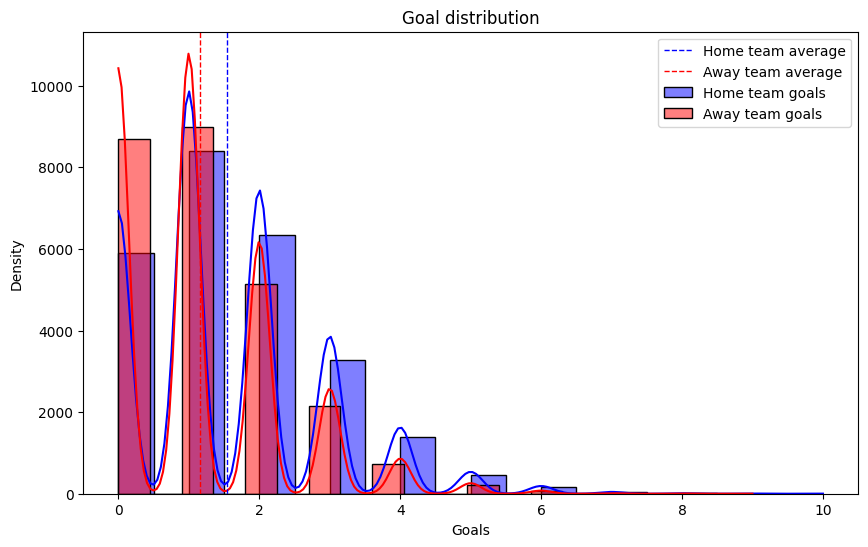

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histogram of goal totals
plt.figure(figsize=(10, 6))
sns.histplot(df_match['home_team_goal'], bins=20, kde=True, color='blue', label='Home team goals', alpha=0.5)
sns.histplot(df_match['away_team_goal'], bins=20, kde=True, color='red', label='Away team goals', alpha=0.5)
plt.axvline(df_match['home_team_goal'].mean(), color='blue', linestyle='dashed', linewidth=1, label='Home team average')
plt.axvline(df_match['away_team_goal'].mean(), color='red', linestyle='dashed', linewidth=1, label='Away team average')
plt.title('Goal distribution')
plt.xlabel('Goals')
plt.ylabel('Density')
plt.legend()
plt.show()

Number of goals.

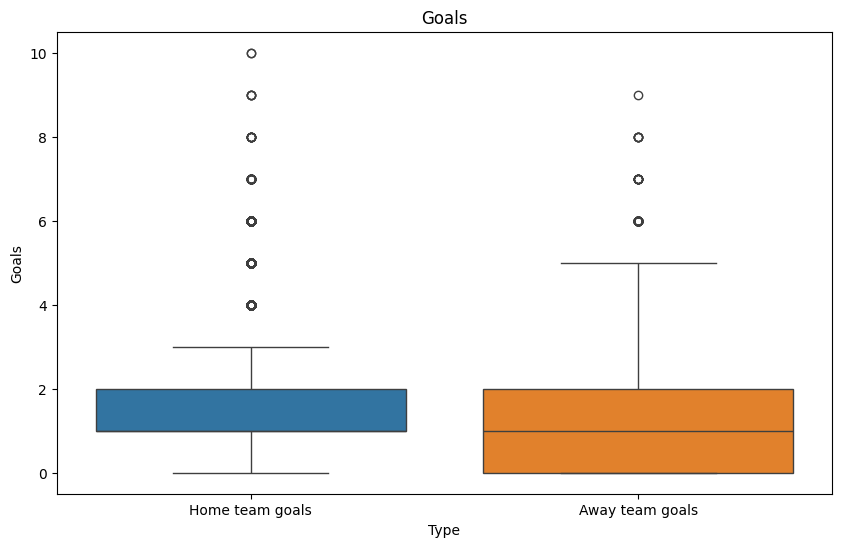

In [18]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_match[['home_team_goal', 'away_team_goal']])
plt.title('Goals')
plt.xlabel('Type')
plt.ylabel('Goals')
plt.xticks([0, 1], ['Home team goals', 'Away team goals'])
plt.show()

### Searching information on teams and countries.

In [19]:
team_info_query = '''
    SELECT 
        Team.team_api_id, Team.team_long_name, League.name as league_name
    FROM 
        Team
    JOIN 
        Match ON Team.team_api_id = Match.home_team_api_id
    JOIN 
        League ON Match.league_id = League.id
    GROUP BY 
        Team.team_api_id;
    '''
team_info = pd.read_sql_query(team_info_query, con)

### Calculating average goal totals by team.

In [20]:

team_goals_home = df_match.groupby('home_team_api_id')['home_team_goal'].mean().reset_index()
team_goals_away = df_match.groupby('away_team_api_id')['away_team_goal'].mean().reset_index()
team_goals_home.columns = ['team_api_id', 'average_home_goals']
team_goals_away.columns = ['team_api_id', 'average_away_goals']

print(team_goals_home.isnull().sum())
print(team_goals_away.isnull().sum())

team_api_id           0
average_home_goals    0
dtype: int64
team_api_id           0
average_away_goals    0
dtype: int64


### Visualizing team-specific average goals by country in Scotland and Germany.

['Poland Ekstraklasa' 'Belgium Jupiler League' 'Portugal Liga ZON Sagres'
 'France Ligue 1' 'Italy Serie A' 'Netherlands Eredivisie'
 'Switzerland Super League' 'Spain LIGA BBVA' 'Scotland Premier League'
 'Germany 1. Bundesliga' 'England Premier League']


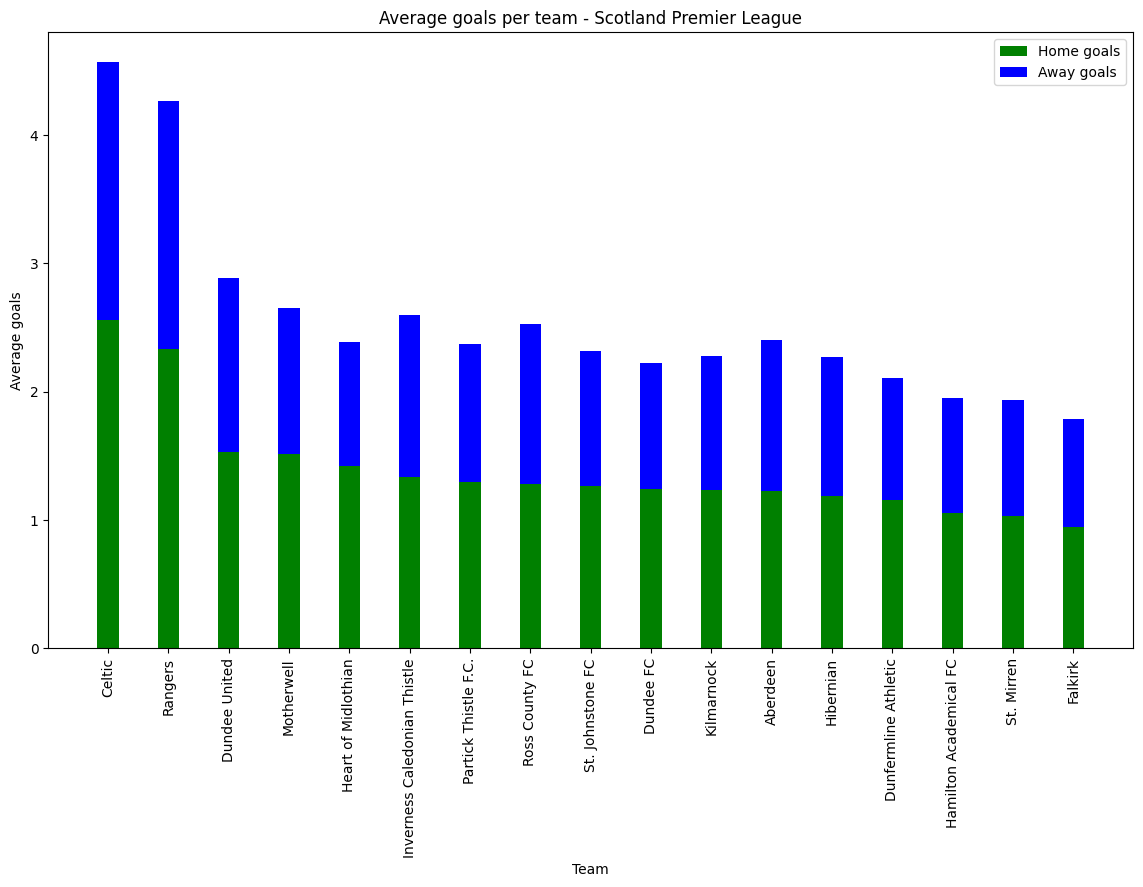

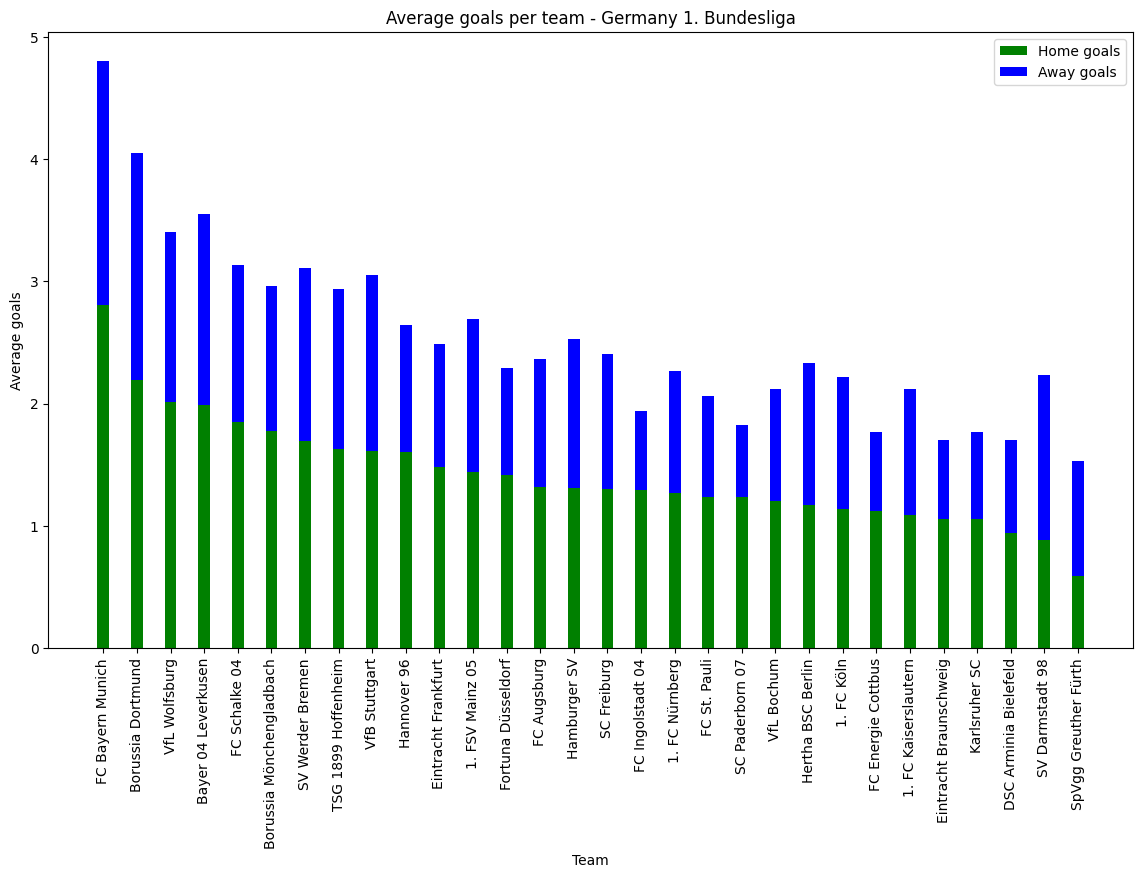

In [21]:
# Combine home and away team goal averages
team_goals = pd.merge(team_goals_home, team_goals_away, on='team_api_id')

# Merge goal averages and team information
team_goals = pd.merge(team_goals, team_info, on='team_api_id')

league_names = team_goals['league_name'].unique()
print(league_names)

for league in ['Scotland Premier League', 'Germany 1. Bundesliga']:
    league_teams = team_goals[team_goals['league_name'] == league]
    league_teams = league_teams.sort_values('average_home_goals', ascending=False)

    plt.figure(figsize=(14, 8))
    bar_width = 0.35
    index = range(len(league_teams))

    p1 = plt.bar(index, league_teams['average_home_goals'], bar_width, label='Home goals', color='green')
    p2 = plt.bar(index, league_teams['average_away_goals'], bar_width, bottom=league_teams['average_home_goals'],
    label='Away goals', color='blue')

    plt.xlabel('Team')
    plt.ylabel('Average goals')
    plt.title(f'Average goals per team - {league}')
    plt.xticks(index, league_teams['team_long_name'], rotation=90)
    plt.legend()
    plt.show()

### The Influence of Home Court Advantage
#### The Real Number of Hoe Wins vs Bettors' Estimate

Home court advantage by league:
                 league_name  total_matches  home_wins  draws  away_wins  \
0            Spain LIGA BBVA           3040       1485    704        851   
1     Netherlands Eredivisie           2448       1171    581        696   
2     Belgium Jupiler League           1728        810    425        493   
3              Italy Serie A           3017       1407    796        814   
4     England Premier League           3040       1390    783        867   
5   Switzerland Super League           1422        650    346        426   
6         Poland Ekstraklasa           1920        870    525        525   
7      Germany 1. Bundesliga           2448       1107    597        744   
8             France Ligue 1           3040       1359    859        822   
9   Portugal Liga ZON Sagres           2052        908    533        611   
10   Scotland Premier League           1824        760    447        617   

    home_win_percentage  draw_percentage  away_win_perc

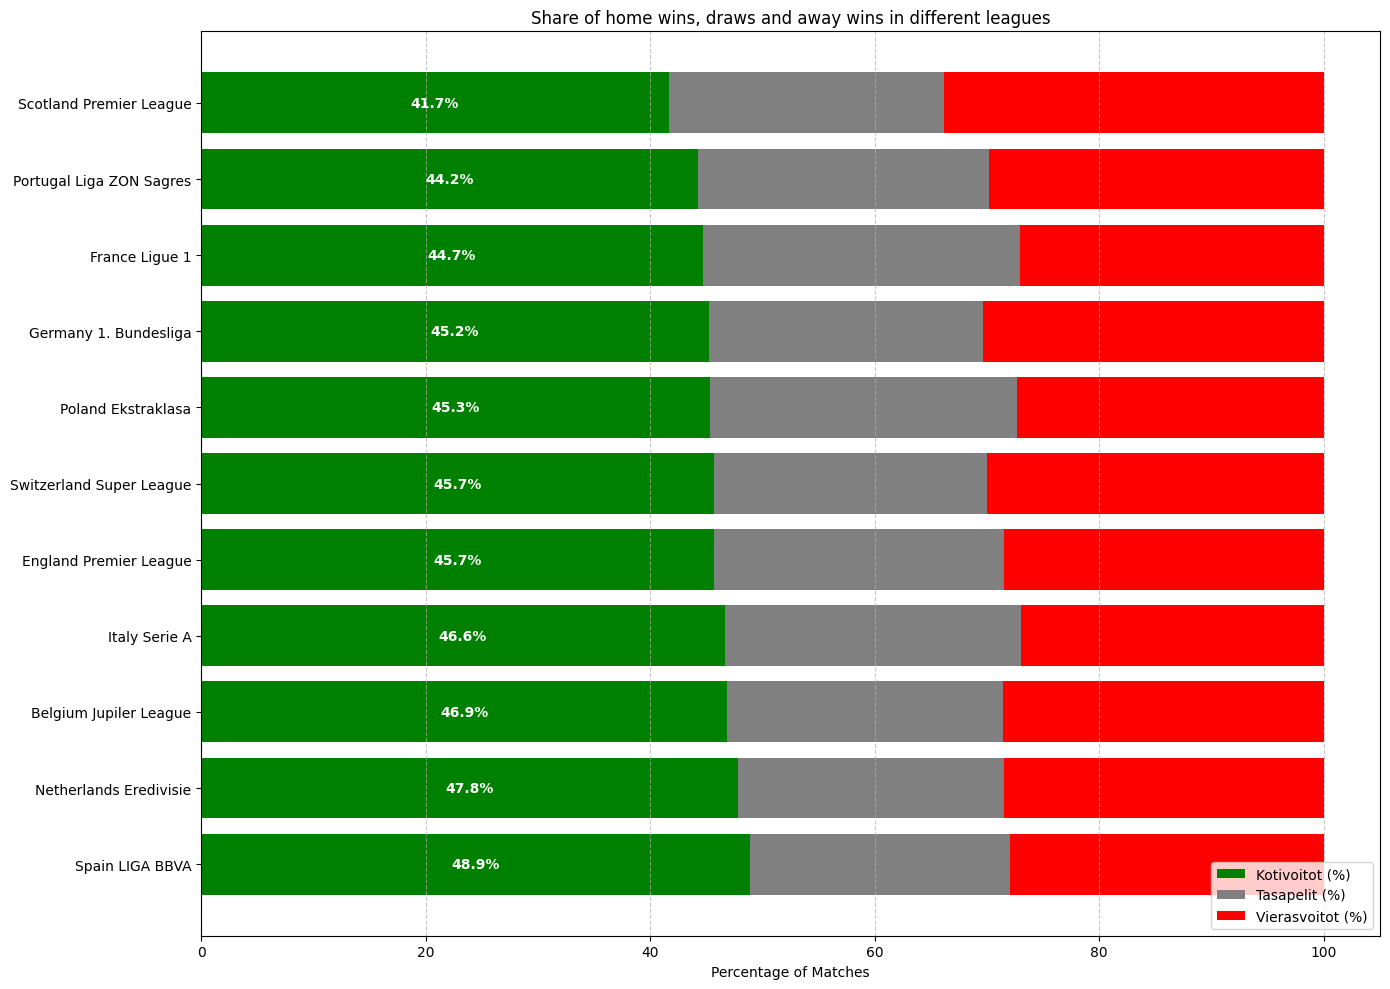

In [22]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

database_path = r"C:\Users\jmhel\OneDrive\Työpöytä\JAMK\DA ML basics\archive\database.sqlite"
conn = sqlite3.connect(database_path)

home_advantage_query = """
SELECT 
    l.name as league_name,
    COUNT(*) as total_matches,
    SUM(CASE WHEN m.home_team_goal > m.away_team_goal THEN 1 ELSE 0 END) as home_wins,
    SUM(CASE WHEN m.home_team_goal = m.away_team_goal THEN 1 ELSE 0 END) as draws,
    SUM(CASE WHEN m.home_team_goal < m.away_team_goal THEN 1 ELSE 0 END) as away_wins,
    ROUND(SUM(CASE WHEN m.home_team_goal > m.away_team_goal THEN 1 ELSE 0 END) * 100.0 / COUNT(*), 2) as home_win_percentage,
    ROUND(SUM(CASE WHEN m.home_team_goal = m.away_team_goal THEN 1 ELSE 0 END) * 100.0 / COUNT(*), 2) as draw_percentage,
    ROUND(SUM(CASE WHEN m.home_team_goal < m.away_team_goal THEN 1 ELSE 0 END) * 100.0 / COUNT(*), 2) as away_win_percentage
FROM Match m
JOIN League l ON m.league_id = l.id
GROUP BY m.league_id
ORDER BY home_win_percentage DESC
"""

home_advantage_df = pd.read_sql_query(home_advantage_query, conn)
print("Home court advantage by league:")
print(home_advantage_df)

plt.figure(figsize=(14, 10))

leagues = home_advantage_df.sort_values('home_win_percentage', ascending=False)['league_name']
home_wins = home_advantage_df.sort_values('home_win_percentage', ascending=False)['home_win_percentage']
draws = home_advantage_df.sort_values('home_win_percentage', ascending=False)['draw_percentage']
away_wins = home_advantage_df.sort_values('home_win_percentage', ascending=False)['away_win_percentage']

bars = plt.barh(leagues, home_wins, color='green', label='Kotivoitot (%)')
plt.barh(leagues, draws, left=home_wins, color='gray', label='Tasapelit (%)')
plt.barh(leagues, away_wins, left=home_wins+draws, color='red', label='Vierasvoitot (%)')

for i, bar in enumerate(bars):
    plt.text(bar.get_width()/2, bar.get_y() + bar.get_height()/2, 
             f"{home_wins.iloc[i]:.1f}%", 
             ha='center', va='center', color='white', fontweight='bold')

plt.xlabel('Percentage of Matches')
plt.title('Share of home wins, draws and away wins in different leagues')
plt.legend(loc='lower right')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig('home_advantage_by_league.png')
plt.show()

In [23]:
goals_analysis_query = """
SELECT 
    l.name as league_name,
    AVG(CASE WHEN m.home_team_goal > m.away_team_goal THEN m.home_team_goal + m.away_team_goal ELSE NULL END) as avg_goals_in_home_wins,
    AVG(CASE WHEN m.home_team_goal <= m.away_team_goal THEN m.home_team_goal + m.away_team_goal ELSE NULL END) as avg_goals_in_other_results,
    AVG(CASE WHEN m.home_team_goal > m.away_team_goal THEN m.home_team_goal ELSE NULL END) as avg_home_goals_in_home_wins,
    AVG(CASE WHEN m.home_team_goal > m.away_team_goal THEN m.away_team_goal ELSE NULL END) as avg_away_goals_in_home_wins
FROM Match m
JOIN League l ON m.league_id = l.id
GROUP BY m.league_id
ORDER BY avg_goals_in_home_wins DESC
"""

goals_analysis_df = pd.read_sql_query(goals_analysis_query, conn)
print("\nScored goals in home wins vs other results:")
print(goals_analysis_df)


betting_analysis_query = """
SELECT 
    l.name as league_name,
    AVG(m.B365H) as avg_home_win_odds_B365,
    AVG(m.BWH) as avg_home_win_odds_BW,
    AVG(m.IWH) as avg_home_win_odds_IW,
    AVG(CASE WHEN m.home_team_goal > m.away_team_goal THEN 1 ELSE 0 END) as actual_home_win_prob,
    ROUND(1/AVG(m.B365H)*100, 2) as implied_home_win_prob_B365,
    ROUND((1/AVG(m.B365H)*100) - (AVG(CASE WHEN m.home_team_goal > m.away_team_goal THEN 1 ELSE 0 END)*100), 2) as prob_difference
FROM Match m
JOIN League l ON m.league_id = l.id
WHERE m.B365H IS NOT NULL AND m.BWH IS NOT NULL AND m.IWH IS NOT NULL
GROUP BY m.league_id
ORDER BY prob_difference DESC
"""


Scored goals in home wins vs other results:
                 league_name  avg_goals_in_home_wins  \
0     Netherlands Eredivisie                3.343296   
1   Switzerland Super League                3.283077   
2      Germany 1. Bundesliga                3.188799   
3            Spain LIGA BBVA                3.088215   
4     Belgium Jupiler League                3.083951   
5     England Premier League                2.969065   
6    Scotland Premier League                2.898684   
7              Italy Serie A                2.896944   
8   Portugal Liga ZON Sagres                2.740088   
9         Poland Ekstraklasa                2.698851   
10            France Ligue 1                2.689478   

    avg_goals_in_other_results  avg_home_goals_in_home_wins  \
0                     2.840251                     2.739539   
1                     2.632124                     2.650769   
2                     2.664430                     2.588979   
3                     2.460450

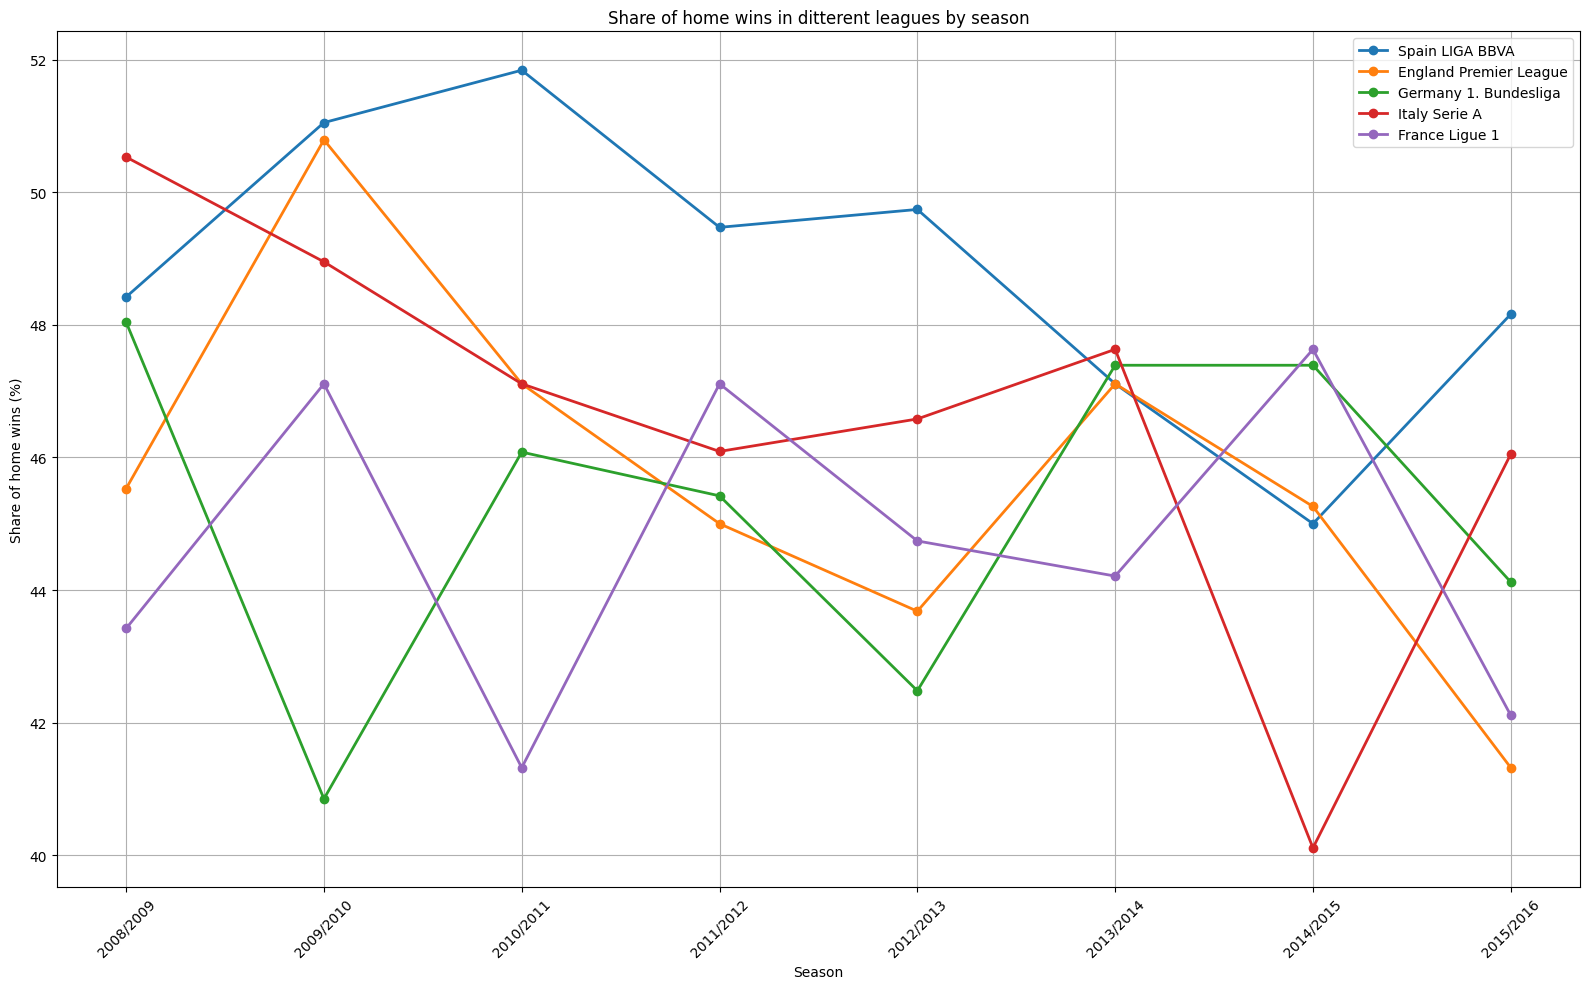

In [24]:
time_trend_query = """
SELECT 
    l.name as league_name,
    m.season,
    COUNT(*) as total_matches,
    SUM(CASE WHEN m.home_team_goal > m.away_team_goal THEN 1 ELSE 0 END) as home_wins,
    ROUND(SUM(CASE WHEN m.home_team_goal > m.away_team_goal THEN 1 ELSE 0 END) * 100.0 / COUNT(*), 2) as home_win_percentage
FROM Match m
JOIN League l ON m.league_id = l.id
GROUP BY m.league_id, m.season
ORDER BY m.league_id, m.season
"""

time_trend_df = pd.read_sql_query(time_trend_query, conn)


plt.figure(figsize=(16, 10))

top_leagues = ['Spain LIGA BBVA', 'England Premier League', 'Germany 1. Bundesliga', 
               'Italy Serie A', 'France Ligue 1']


filtered_df = time_trend_df[time_trend_df['league_name'].isin(top_leagues)]


for league in top_leagues:
    league_data = filtered_df[filtered_df['league_name'] == league]
    plt.plot(league_data['season'], league_data['home_win_percentage'], 'o-', label=league, linewidth=2)

plt.xlabel('Season')
plt.ylabel('Share of home wins (%)')
plt.title('Share of home wins in ditterent leagues by season')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('home_advantage_trend.png')
plt.show()


Analysis of betting odds for home wins:
                league_name  avg_home_win_odds_B365  avg_home_win_odds_BW  \
0            France Ligue 1                2.409057              2.387072   
1    Belgium Jupiler League                2.411461              2.365881   
2   Scotland Premier League                2.802007              2.642611   
3     Germany 1. Bundesliga                2.597654              2.542535   
4             Italy Serie A                2.505640              2.474064   
5    England Premier League                2.701683              2.603168   
6    Netherlands Eredivisie                2.590854              2.504300   
7  Portugal Liga ZON Sagres                2.936259              2.834358   
8           Spain LIGA BBVA                2.762510              2.701973   

   avg_home_win_odds_IW  actual_home_win_prob  implied_home_win_prob_B365  \
0              2.309829              0.446423                       41.51   
1              2.291291           

<Figure size 1400x800 with 0 Axes>

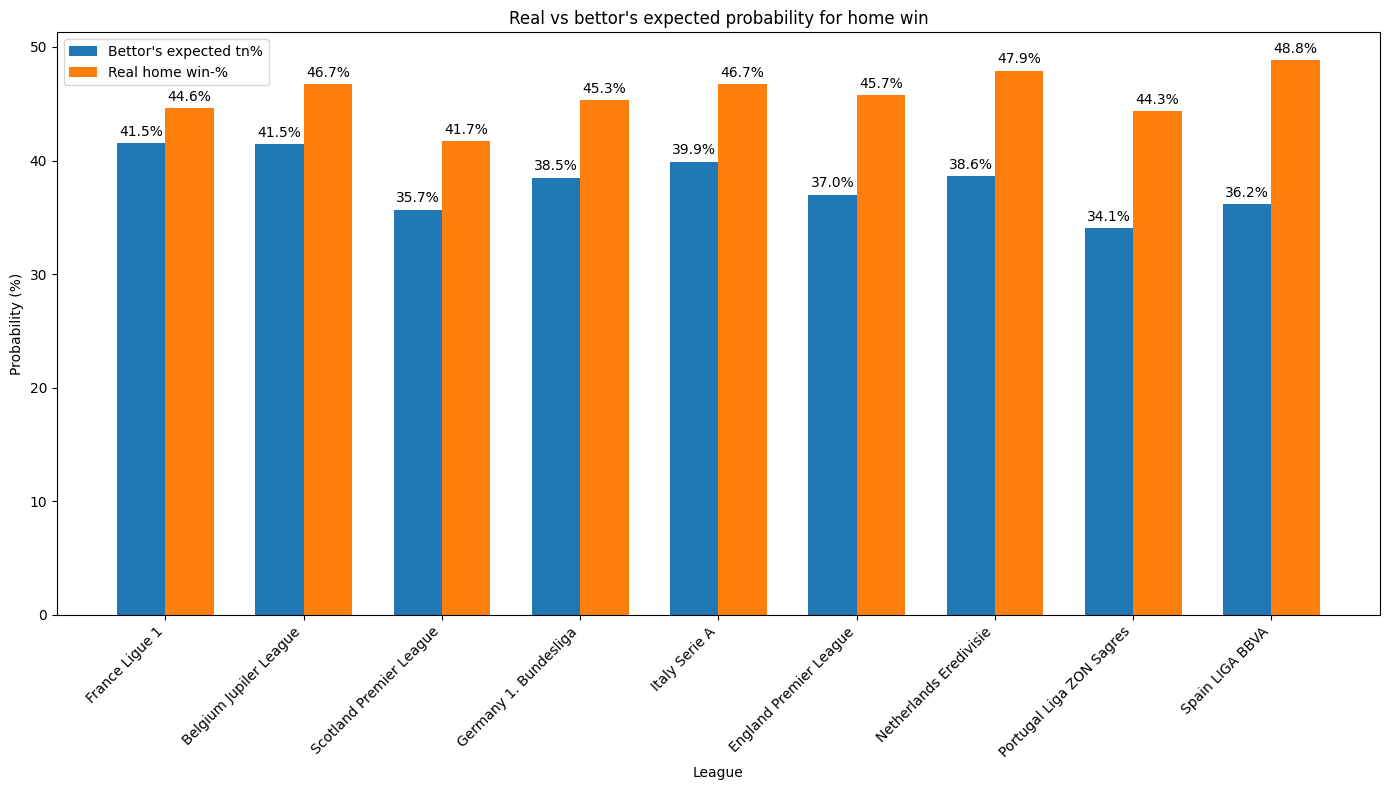

In [25]:
betting_analysis_df = pd.read_sql_query(betting_analysis_query, conn)
print("\nAnalysis of betting odds for home wins:")
print(betting_analysis_df)

plt.figure(figsize=(14, 8))

implied_probs = betting_analysis_df['implied_home_win_prob_B365']
actual_probs = betting_analysis_df['actual_home_win_prob'] * 100
leagues = betting_analysis_df['league_name']

x = np.arange(len(leagues))
width = 0.35

fig, ax = plt.subplots(figsize=(14, 8))
rects1 = ax.bar(x - width/2, implied_probs, width, label="Bettor's expected tn%")
rects2 = ax.bar(x + width/2, actual_probs, width, label='Real home win-%')

ax.set_xlabel('League')
ax.set_ylabel('Probability (%)')
ax.set_title("Real vs bettor's expected probability for home win")
ax.set_xticks(x)
ax.set_xticklabels(leagues, rotation=45, ha='right')
ax.legend()

def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.1f}%',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

fig.tight_layout()
plt.savefig('odds_vs_actual_home_wins.png')
plt.show()

conn.close()

## FC Barcelona & Messi analysis
### Analyzing FC Barcelona's performance with Messi vs.without Messi


Found 304 FC Barcelona matches
Messi played: 249 matches
Messi did bot play: 55 matches

Barcelona performance:
Win percentage with Messi: 77.91%
Win percentage without Messi: 72.73%

Average goals per game:
               barcelona_goals  opponent_goals
messi_playing                                 
False                 2.181818        0.709091
True                  2.927711        0.775100

Average points per match:
messi_playing
False    2.363636
True     2.469880
Name: points, dtype: float64
Performance by league:
       league_name  messi_playing  win_percentage  avg_goals_scored  \
0  Spain LIGA BBVA          False       72.727273          2.181818   
1  Spain LIGA BBVA           True       77.911647          2.927711   

   avg_goals_conceded  avg_points  
0            0.709091    2.363636  
1            0.775100    2.469880  


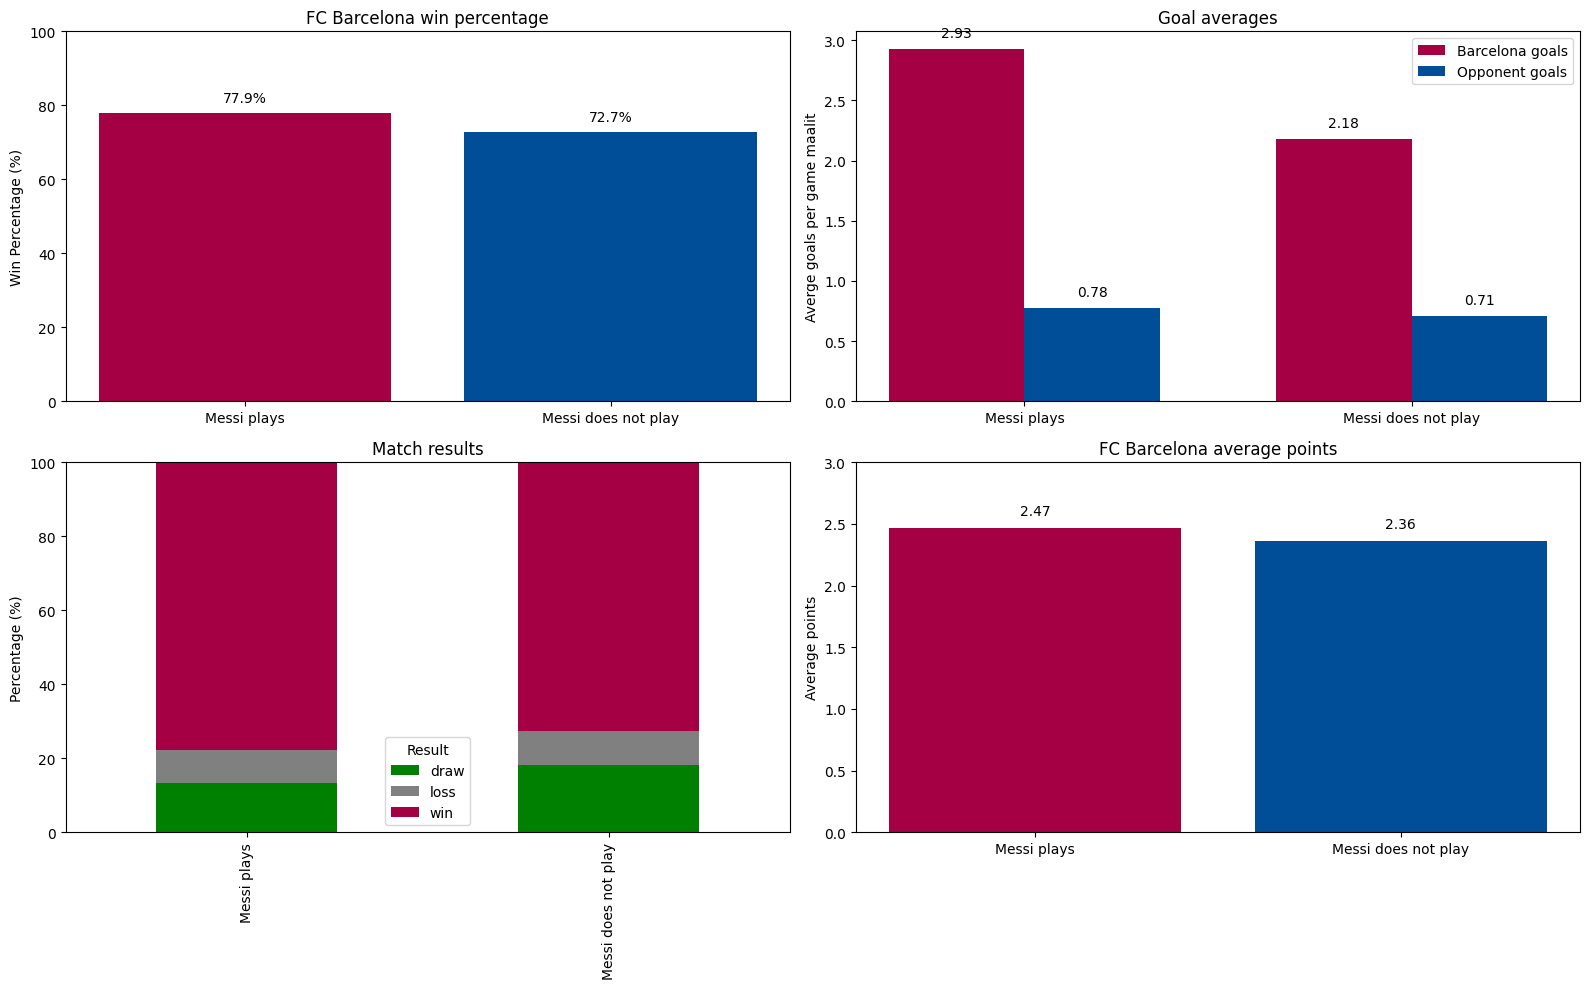

In [26]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


database_path = r"C:\Users\jmhel\OneDrive\Työpöytä\JAMK\DA ML basics\archive\database.sqlite"
conn = sqlite3.connect(database_path)

barcelona_id = 8634
messi_id = 30981

barcelona_matches_query = f"""
SELECT 
    m.id, m.season, m.date,
    m.home_team_api_id, m.away_team_api_id,
    m.home_team_goal, m.away_team_goal,
    m.home_player_1, m.home_player_2, m.home_player_3, m.home_player_4, m.home_player_5,
    m.home_player_6, m.home_player_7, m.home_player_8, m.home_player_9, m.home_player_10, m.home_player_11,
    m.away_player_1, m.away_player_2, m.away_player_3, m.away_player_4, m.away_player_5,
    m.away_player_6, m.away_player_7, m.away_player_8, m.away_player_9, m.away_player_10, m.away_player_11,
    l.name as league_name
FROM Match m
LEFT JOIN League l ON m.league_id = l.id
WHERE m.home_team_api_id = {barcelona_id} OR m.away_team_api_id = {barcelona_id}
ORDER BY m.date
"""

barcelona_matches = pd.read_sql_query(barcelona_matches_query, conn)

barcelona_matches['barcelona_position'] = barcelona_matches.apply(
    lambda row: 'home' if row['home_team_api_id'] == barcelona_id else 'away', axis=1)

barcelona_matches['barcelona_goals'] = barcelona_matches.apply(
    lambda row: row['home_team_goal'] if row['home_team_api_id'] == barcelona_id else row['away_team_goal'], axis=1)

barcelona_matches['opponent_goals'] = barcelona_matches.apply(
    lambda row: row['away_team_goal'] if row['home_team_api_id'] == barcelona_id else row['home_team_goal'], axis=1)

def determine_result(row):
    if row['barcelona_position'] == 'home':
        if row['home_team_goal'] > row['away_team_goal']:
            return 'win'
        elif row['home_team_goal'] < row['away_team_goal']:
            return 'loss'
        else:
            return 'draw'
    else: 
        if row['away_team_goal'] > row['home_team_goal']:
            return 'win'
        elif row['away_team_goal'] < row['home_team_goal']:
            return 'loss'
        else:
            return 'draw'

barcelona_matches['result'] = barcelona_matches.apply(determine_result, axis=1)


def messi_playing(row):
    position = row['barcelona_position']
    players = []
    
    for i in range(1, 12):
        player = row[f'{position}_player_{i}']
      
        if pd.notna(player):
            players.append(int(player))
    
    return messi_id in players

barcelona_matches['messi_playing'] = barcelona_matches.apply(messi_playing, axis=1)
barcelona_matches['points'] = barcelona_matches['result'].map({'win': 3, 'draw': 1, 'loss': 0})

print(f"\nFound {len(barcelona_matches)} FC Barcelona matches")
messi_playing_count = barcelona_matches['messi_playing'].value_counts()
print(f"Messi played: {messi_playing_count.get(True, 0)} matches")
print(f"Messi did bot play: {messi_playing_count.get(False, 0)} matches")

results_by_messi = barcelona_matches.groupby('messi_playing')['result'].value_counts().unstack().fillna(0)
goals_by_messi = barcelona_matches.groupby('messi_playing')[['barcelona_goals', 'opponent_goals']].mean()
avg_points_by_messi = barcelona_matches.groupby('messi_playing')['points'].mean()

if True in results_by_messi.index:
    win_percentage_with_messi = results_by_messi.loc[True, 'win'] / results_by_messi.loc[True].sum() * 100
else:
    win_percentage_with_messi = 0
    
if False in results_by_messi.index:
    win_percentage_without_messi = results_by_messi.loc[False, 'win'] / results_by_messi.loc[False].sum() * 100
else:
    win_percentage_without_messi = 0

print("\nBarcelona performance:")
print(f"Win percentage with Messi: {win_percentage_with_messi:.2f}%")
print(f"Win percentage without Messi: {win_percentage_without_messi:.2f}%")
print("\nAverage goals per game:")
print(goals_by_messi)
print("\nAverage points per match:")
print(avg_points_by_messi)

if 'league_name' in barcelona_matches.columns:
    league_performance = barcelona_matches.groupby(['league_name', 'messi_playing']).agg({
        'result': lambda x: (x == 'win').mean() * 100, 
        'barcelona_goals': 'mean',
        'opponent_goals': 'mean',
        'points': 'mean'
    }).reset_index()
    
    league_performance = league_performance.rename(columns={
        'result': 'win_percentage',
        'barcelona_goals': 'avg_goals_scored',
        'opponent_goals': 'avg_goals_conceded',
        'points': 'avg_points'
    })
    
    print("Performance by league:")
    print(league_performance)


plt.figure(figsize=(16, 10))


plt.subplot(2, 2, 1)
labels = ['Messi plays', 'Messi does not play']
plt.bar(labels, [win_percentage_with_messi, win_percentage_without_messi], color=['#A50044', '#004D98'])
plt.ylabel('Win Percentage (%)')
plt.title('FC Barcelona win percentage')
plt.ylim(0, 100)
for i, v in enumerate([win_percentage_with_messi, win_percentage_without_messi]):
    plt.text(i, v + 3, f"{v:.1f}%", ha='center')


plt.subplot(2, 2, 2)
x = np.arange(2)
width = 0.35
if not goals_by_messi.empty:
    barcelona_goals = [
        goals_by_messi.loc[True, 'barcelona_goals'] if True in goals_by_messi.index else 0,
        goals_by_messi.loc[False, 'barcelona_goals'] if False in goals_by_messi.index else 0
    ]
    opponent_goals = [
        goals_by_messi.loc[True, 'opponent_goals'] if True in goals_by_messi.index else 0,
        goals_by_messi.loc[False, 'opponent_goals'] if False in goals_by_messi.index else 0
    ]
    
    plt.bar(x - width/2, barcelona_goals, width, label='Barcelona goals', color='#A50044')
    plt.bar(x + width/2, opponent_goals, width, label='Opponent goals', color='#004D98')
    plt.ylabel('Averge goals per game maalit')
    plt.title('Goal averages')
    plt.xticks(x, labels)
    plt.legend()
    
    for i, v in enumerate(barcelona_goals):
        plt.text(i - width/2, v + 0.1, f"{v:.2f}", ha='center')
    for i, v in enumerate(opponent_goals):
        plt.text(i + width/2, v + 0.1, f"{v:.2f}", ha='center')

plt.subplot(2, 2, 3)
if not results_by_messi.empty:
    for result_type in ['win', 'draw', 'loss']:
        if result_type not in results_by_messi.columns:
            results_by_messi[result_type] = 0
    
   
    if True in results_by_messi.index:
        results_with_messi = results_by_messi.loc[True]
        results_percentages_with_messi = results_with_messi / results_with_messi.sum() * 100
    else:
        results_percentages_with_messi = pd.Series({'win': 0, 'draw': 0, 'loss': 0})
    
    if False in results_by_messi.index:
        results_without_messi = results_by_messi.loc[False]
        results_percentages_without_messi = results_without_messi / results_without_messi.sum() * 100
    else:
        results_percentages_without_messi = pd.Series({'win': 0, 'draw': 0, 'loss': 0})
    
    results_df = pd.DataFrame({
        'Messi plays': results_percentages_with_messi,
        'Messi does not play': results_percentages_without_messi
    }).T
    
    results_df.plot(kind='bar', stacked=True, ax=plt.gca(), color=['#008000', '#808080', '#A50044'])
    plt.ylabel('Percentage (%)')
    plt.title('Match results')
    plt.legend(title='Result')
    plt.ylim(0, 100)

plt.subplot(2, 2, 4)
points = [
    avg_points_by_messi.loc[True] if True in avg_points_by_messi.index else 0,
    avg_points_by_messi.loc[False] if False in avg_points_by_messi.index else 0
]
plt.bar(labels, points, color=['#A50044', '#004D98'])
plt.ylabel('Average points')
plt.title('FC Barcelona average points')
plt.ylim(0, 3)
for i, v in enumerate(points):
    plt.text(i, v + 0.1, f"{v:.2f}", ha='center')

plt.tight_layout()
plt.savefig('barcelona_messi_analysis.png')
plt.show()

conn.close()